# Materials Project & Pymatgen

## Materials Project API

API 소개 페이지 [Link](https://next-gen.materialsproject.org/api)

API 기능 소개 페이지 [Link](https://docs.materialsproject.org/downloading-data/how-do-i-download-the-materials-project-database)

API 테스트 페이지 [Link](https://api.materialsproject.org/docs)

Materials project에서 제공하는 application programming interface (API)는 Materials Project에 있는 데이터를 대량으로 다운로드 할 수 있도록 해줌

In [217]:
from mp_api.client import MPRester
from monty.serialization import dumpfn, loadfn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json

# API-Key는 Materials Project 가입 후 확인 가능
# https://api.materialsproject.org/docs
# 보안을 위해 파일에 저장 후 활용하며, 공개 repository에 업로드 되지 않도록 
# .gitignore에 예외 처리 할 것.
api_key = json.load(open('../.credential.json'))['api_key']

- Li 및 O가 포함된 3원계 화합물 검색 후, ID, Bandgap, Formula를 받아옴

In [137]:
with MPRester(api_key) as mpr:
    data = mpr.materials.summary.search(
            elements=["Li", "O"], 
            fields=['material_id', 'formula_pretty','structure',
                    'band_gap','volume','density','e_total'
                    'uncorrected_energy_per_atom', 
                    'energy_per_atom', 'formation_energy_per_atom'],
            num_elements=3
        )

# monty 형식으로 데이터 저장
dumpfn(data, '../data/mp_Li_O_3ele.monty')

Retrieving SummaryDoc documents:   0%|          | 0/2192 [00:00<?, ?it/s]

In [165]:
print(data[0])

MPDataDoc<SummaryDoc>
formula_pretty='LiLaO2',
volume=212.49902529003253,
density=5.558971731601202,
material_id=MPID(mp-1020057),
structure=Structure Summary
Lattice
    abc : 6.239226 5.895163 5.926894581398424
 angles : 77.1028651448671 90.0 90.0
 volume : 212.49902529003253
      A : 6.239226 0.0 0.0
      B : 0.0 5.895163 0.0
      C : 0.0 1.322891 5.777373
    pbc : True True True
PeriodicSite: Li (3.986, 2.794, 3.784) [0.6389, 0.327, 0.6549]
PeriodicSite: Li (0.8664, 1.476, 1.994) [0.1389, 0.173, 0.3451]
PeriodicSite: Li (2.253, 4.424, 1.994) [0.3611, 0.673, 0.3451]
PeriodicSite: Li (5.373, 5.742, 3.784) [0.8611, 0.827, 0.6549]
PeriodicSite: La (3.547, 1.41, 1.156) [0.5684, 0.1942, 0.2]
PeriodicSite: La (0.427, 2.861, 4.622) [0.06844, 0.3058, 0.8]
PeriodicSite: La (2.693, 5.809, 4.622) [0.4316, 0.8058, 0.8]
PeriodicSite: La (5.812, 4.357, 1.156) [0.9316, 0.6942, 0.2]
PeriodicSite: O (4.746, 1.287, 5.274) [0.7606, 0.01337, 0.9129]
PeriodicSite: O (1.626, 2.984, 0.503) [0.2606, 0.

- 데이터 분석

In [214]:
data_elements = {}
for d in data:
    for atom, num in json.loads(d.structure.composition.to_json()).items():
        if atom.startswith('@'): continue
        if atom not in data_elements.keys():
            data_elements[atom] = 0
        data_elements[atom] += 1
data_elements = {k:v for k,v in sorted(data_elements.items(), key=lambda x:x[1], reverse=True)}

In [182]:
data_elements

{'Li': 2192,
 'O': 2192,
 'Mn': 482,
 'Co': 335,
 'Fe': 176,
 'V': 169,
 'Ni': 142,
 'Cr': 133,
 'Ti': 120,
 'Nb': 49,
 'Bi': 40,
 'Cu': 37,
 'Mo': 34,
 'B': 28,
 'W': 27,
 'Ta': 25,
 'C': 25,
 'Si': 21,
 'Zr': 16,
 'I': 15,
 'Sb': 14,
 'Ge': 14,
 'Te': 14,
 'Se': 13,
 'P': 12,
 'Hf': 12,
 'U': 10,
 'Ga': 10,
 'Ru': 10,
 'N': 9,
 'Re': 9,
 'Ag': 8,
 'La': 7,
 'Ce': 7,
 'Al': 7,
 'Au': 7,
 'Cl': 7,
 'Pt': 7,
 'Br': 7,
 'S': 7,
 'Nd': 6,
 'H': 6,
 'Os': 6,
 'Ho': 5,
 'Sr': 5,
 'Gd': 5,
 'Ir': 5,
 'In': 5,
 'As': 5,
 'Sn': 5,
 'Eu': 4,
 'Lu': 4,
 'Pr': 4,
 'Tm': 4,
 'Zn': 4,
 'Pd': 4,
 'Pb': 4,
 'K': 3,
 'Dy': 3,
 'Tl': 3,
 'Rh': 3,
 'Er': 3,
 'Rb': 3,
 'Ba': 3,
 'Na': 3,
 'Tb': 3,
 'Sm': 2,
 'Cs': 2,
 'Y': 2,
 'Tc': 2,
 'Mg': 2,
 'Sc': 1,
 'Be': 1,
 'Ca': 1,
 'Pm': 1,
 'Ac': 1,
 'Pa': 1,
 'Cd': 1,
 'Hg': 1,
 'Np': 1}

In [213]:
# 20번 이하 사용된 원소가 포함된 데이터는 제거
exclude_elements = [atom for atom, num in data_elements.items() if num < 20]
cleaned_data = []
for d in data:
    n = sum([ele.symbol in exclude_elements for ele in d.structure.types_of_species])
    if n != 0: 
        continue
    cleaned_data.append(d)

dumpfn(cleaned_data, '../data/mp_Li_O_3ele_clean.monty')
len(cleaned_data)

1843

In [230]:
total_elements = {}
band_gap = []
n_elements = []
for d in cleaned_data:
    band_gap.append(d.band_gap)
    n_elements.append(len(d.structure))
    for atom, num in json.loads(d.structure.composition.to_json()).items():
        if atom.startswith('@'): continue
        if atom not in total_elements.keys():
            total_elements[atom] = 0
        total_elements[atom] += num
band_gap = np.array(band_gap)
total_elements = {k:v for k,v in sorted(total_elements.items(), key=lambda x:x[1], reverse=True)}

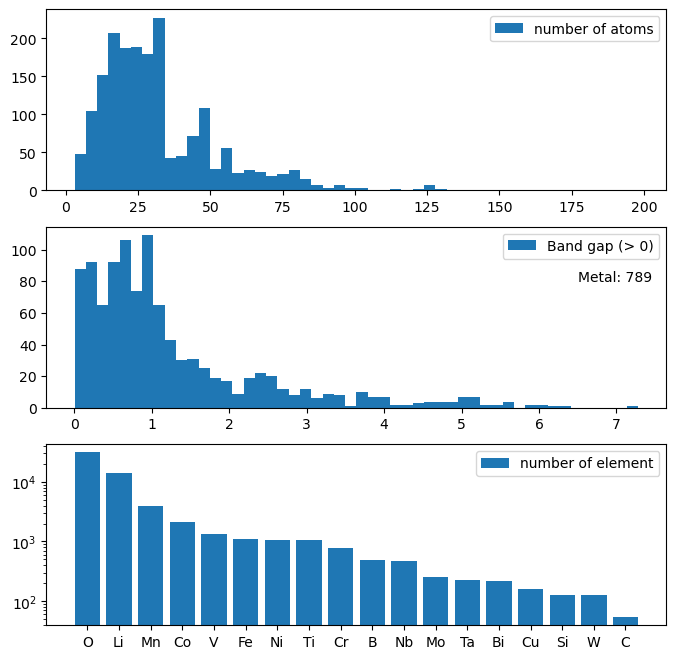

In [249]:
f, axs = plt.subplots(3, 1, figsize=(8,8))
axs[0].hist(n_elements, bins=50, label='number of atoms')
axs[1].hist(band_gap[band_gap > 0], bins=50, label='Band gap (> 0)')
axs[1].text(6.5, 80, f'Metal: {np.sum(band_gap <= 0)}')
axs[2].bar(total_elements.keys(), total_elements.values(), label='number of element')
axs[2].set_yscale('log')
for ax in axs: ax.legend(loc='upper right')

## Pymatgen

[pymatgen](https://pymatgen.org/index.html) : G. Ceder 그룹에서 개발한 소재 분석 툴

In [250]:
# 저장된 데이터 불러오기
data = loadfn('../data/mp_Li_O_3ele_clean.monty')

- Pymatgen 내부 기능을 활용한 그래프 생성

In [253]:
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CrystalNN # 이 외에도 다양한 algorithm 있음. 

stru = data[0]['structure']
nn = CrystalNN()
nn_info = nn.get_all_nn_info(stru)

G = StructureGraph.with_local_env_strategy(stru, nn)
G

/home/jhyang/anaconda3/envs/gnn/lib/python3.9/site-packages/pymatgen/analysis/local_env.py:4135: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/home/jhyang/anaconda3/envs/gnn/lib/python3.9/site-packages/pymatgen/analysis/local_env.py:3928: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


Structure Graph
Structure: 
Structure Summary
Lattice
    abc : 4.889841128099153 4.889841128099153 4.810924
 angles : 90.0 90.0 138.13078574470023
 volume : 76.77597934532146
      A : 1.747151 -4.567057 0.0
      B : 1.747151 4.567057 0.0
      C : 0.0 0.0 4.810924
    pbc : True True True
PeriodicSite: Li (1.747, -2.074, 3.608) [0.7271, 0.2729, 0.75]
PeriodicSite: Li (1.747, 2.074, 1.203) [0.2729, 0.7271, 0.25]
PeriodicSite: Cu (0.0, 0.0, 2.405) [0.0, 0.0, 0.5]
PeriodicSite: Cu (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: O (1.747, -3.162, 1.203) [0.8462, 0.1538, 0.25]
PeriodicSite: O (1.747, 3.162, 3.608) [0.1538, 0.8462, 0.75]
Graph: bonds
from    to  to_image    
----  ----  ------------
   0     5  (0, -1, 0)  
   0     5  (1, 0, 0)   
   1     4  (-1, 0, 0)  
   1     4  (0, 1, 0)   
   2     4  (-1, 0, 0)  
   2     5  (0, -1, 0)  
   3     4  (-1, 0, 0)  
   3     5  (0, -1, -1) 

- 직접 그래프 생성

In [260]:
neighbors = stru.get_all_neighbors(r=3)
pairs = []
for i, nns in enumerate(neighbors):
    for n in nns:
        print('{:>2s}{:2d} - {:>2s}{:2d} / {:10.7f}'.format(
            stru[i].species_string, i, n.species_string, n.index, n.nn_distance))
        pair = (i, n.index, f'{n.nn_distance:.8f}')
        if pair not in pairs:
            pairs.append(pair)

Li 0 - Cu 2 /  2.7678885
Li 0 - Cu 3 /  2.7678885
Li 0 -  O 4 /  2.6400933
Li 0 -  O 5 /  1.8709498
Li 0 -  O 4 /  2.6400933
Li 0 - Cu 2 /  2.9666728
Li 0 - Cu 3 /  2.9666728
Li 0 -  O 5 /  1.8709498
Li 0 - Cu 2 /  2.9666728
Li 0 - Cu 3 /  2.9666728
Li 1 - Cu 3 /  2.9666728
Li 1 - Cu 2 /  2.9666728
Li 1 -  O 4 /  1.8709498
Li 1 -  O 5 /  2.6400933
Li 1 - Cu 3 /  2.7678885
Li 1 - Cu 2 /  2.7678885
Li 1 -  O 5 /  2.6400933
Li 1 - Cu 3 /  2.9666728
Li 1 - Cu 2 /  2.9666728
Li 1 -  O 4 /  1.8709498
Cu 2 - Li 0 /  2.9666728
Cu 2 - Li 1 /  2.9666728
Cu 2 - Li 1 /  2.7678885
Cu 2 - Li 0 /  2.9666728
Cu 2 -  O 5 /  1.8493859
Cu 2 - Cu 3 /  2.4054620
Cu 2 - Li 1 /  2.9666728
Cu 2 -  O 4 /  1.8493859
Cu 2 - Cu 3 /  2.4054620
Cu 2 - Li 0 /  2.7678885
Cu 3 - Li 0 /  2.9666728
Cu 3 - Li 1 /  2.9666728
Cu 3 - Li 0 /  2.9666728
Cu 3 -  O 5 /  1.8493859
Cu 3 - Li 1 /  2.7678885
Cu 3 - Cu 2 /  2.4054620
Cu 3 - Li 0 /  2.7678885
Cu 3 - Cu 2 /  2.4054620
Cu 3 - Li 1 /  2.9666728
Cu 3 -  O 4 /  1.8493859


In [261]:
for p in pairs:
    if p[0] == 0: print(p)

(0, 2, '2.76788848')
(0, 3, '2.76788848')
(0, 4, '2.64009331')
(0, 5, '1.87094980')
(0, 2, '2.96667275')
(0, 3, '2.96667275')


## mendeleev periodic table

Periodic table을 python으로 활용할 수 있도록 만들어진 library

In [256]:
from mendeleev.fetch import fetch_table

periodic_table = fetch_table('elements')
periodic_table

,annotation,atomic_number,atomic_radius,atomic_volume,block,density,description,dipole_polarizability,electron_affinity,electronic_configuration,...,discovery_year,discovery_location,name_origin,sources,uses,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number,molar_heat_capacity
0,"density(@ -253C), evaporation_heat(H-H), fusio...",1,25.0,14.1,s,0.000082,"Colourless, odourless gaseous chemical element...",4.50711,0.754195,1s,...,1766.0,England,Greek: hydro (water) and genes (generate),Commercial quantities are produced by reacting...,Most hydrogen is used in the production of amm...,105,0.00003,103.0,103.0,28.836
1,"density(@ -270C),",2,120.0,31.8,s,0.000164,"Colourless, odourless gaseous nonmetallic elem...",1.38375,-19.700000,1s2,...,1895.0,Scotland/Sweden,Greek: hêlios (sun).,Found in natural gas deposits & in the air (5 ...,"Used in balloons, deep sea diving & welding. A...",112,0.00002,1.0,1.0,20.786
2,,3,145.0,13.1,s,0.534000,Socket silvery metal. First member of group 1 ...,164.11250,0.618049,[He] 2s,...,1817.0,Sweden,Greek: lithos (stone).,Obtained by passing electric charge through me...,Used in batteries. Also for certain kinds of g...,1,0.00050,12.0,12.0,24.860
3,,4,105.0,5.0,s,1.850000,Grey metallic element of group 2 of the period...,37.74000,-2.400000,[He] 2s2,...,1798.0,Germany/France,"Greek: beryllos, ""beryl"" (a mineral).",Found mostly in minerals like beryl [AlBe3(Si6...,Its ability to absorb large amounts of heat ma...,75,0.03000,77.0,77.0,16.443
4,,5,85.0,4.6,p,2.340000,An element of group 13 of the periodic table. ...,20.50000,0.279723,[He] 2s2 2p,...,1808.0,England/France,From Arabic and Persian words for borax.,"Obtained from kernite, a kind of borax (Na2B4O...",Used with titanium & tungsten to make heat res...,81,0.10000,86.0,86.0,11.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,,114,NaN,NaN,p,9.928000,None,31.00000,NaN,[Rn] 5f14 6d10 7s2 7p2,...,1998.0,Russia,Named after the Flerov Laboratory of Nuclear R...,Made by bombarding plutonium-244 with calcium-48.,None,92,4.00000,NaN,NaN,NaN
114,,115,NaN,NaN,p,13.500000,None,71.00000,NaN,[Rn] 5f14 6d10 7s2 7p3,...,2003.0,Russia,Named after the city of Moscov.,Made by bombarding americium-243 with calcium-48.,None,98,20.00000,NaN,NaN,NaN
115,,116,NaN,NaN,p,12.900000,None,NaN,NaN,[Rn] 5f14 6d10 7s2 7p4,...,2000.0,United States,Named after the Lawrence Livermore National La...,Made by bombardng curium-248 with calcium-48.,None,104,NaN,NaN,NaN,NaN
116,,117,NaN,NaN,p,7.200000,None,76.00000,NaN,[Rn] 5f14 6d10 7s2 7p5,...,2010.0,Russia/United States,Named after the state of Tennessee in United S...,Made by bombarding berkelium-249 with calcium-48.,None,111,15.00000,NaN,NaN,NaN


In [268]:
feats = ['atomic_number', 'atomic_radius', 'atomic_volume', 'group_id', 'period', 'en_pauling']
periodic_table[feats]

,atomic_number,atomic_radius,atomic_volume,group_id,period,en_pauling
0,1,25.0,14.1,1.0,1,2.20
1,2,120.0,31.8,18.0,1,NaN
2,3,145.0,13.1,1.0,2,0.98
3,4,105.0,5.0,2.0,2,1.57
4,5,85.0,4.6,13.0,2,2.04
...,...,...,...,...,...,...
113,114,NaN,NaN,14.0,7,NaN
114,115,NaN,NaN,15.0,7,NaN
115,116,NaN,NaN,16.0,7,NaN
116,117,NaN,NaN,17.0,7,NaN


In [287]:
from pymatgen.core.structure import Element

atom_feat_table = periodic_table[feats].values
for atom, num in total_elements.items():
    print(atom, num, '\t', atom_feat_table[Element(atom).number - 1])
#atom_feat_table[[Element(e).number - 1 for e in total_elements.keys()]]

O 31225.0 	 [ 8.   60.   14.   16.    2.    3.44]
Li 14332.0 	 [  3.   145.    13.1    1.     2.     0.98]
Mn 3987.0 	 [ 25.   140.     7.39   7.     4.     1.55]
Co 2139.0 	 [ 27.   135.     6.7    9.     4.     1.88]
V 1313.0 	 [ 23.   135.     8.35   5.     4.     1.63]
Fe 1099.0 	 [ 26.   140.     7.1    8.     4.     1.83]
Ni 1072.0 	 [ 28.   135.     6.6   10.     4.     1.91]
Ti 1054.0 	 [ 22.   140.    10.6    4.     4.     1.54]
Cr 769.0 	 [ 24.   140.     7.23   6.     4.     1.66]
B 481.0 	 [ 5.   85.    4.6  13.    2.    2.04]
Nb 469.0 	 [ 41.  145.   10.8   5.    5.    1.6]
Mo 249.0 	 [ 42.   145.     9.4    6.     5.     2.16]
Ta 223.0 	 [ 73.  145.   10.9   5.    6.    1.5]
Bi 219.0 	 [ 83.  160.   21.3  15.    6.    1.9]
Cu 160.0 	 [ 29.  135.    7.1  11.    4.    1.9]
Si 127.0 	 [ 14.  110.   12.1  14.    3.    1.9]
W 126.0 	 [ 74.   135.     9.53   6.     6.     1.7 ]
C 54.0 	 [ 6.   70.    5.3  14.    2.    2.55]


In [302]:
from mendeleev.fetch import fetch_table

periodic_table = fetch_table('elements')
feats = ['atomic_number', 'atomic_radius', 'atomic_volume', 'group_id', 'period', 'en_pauling']
atom_feat_table = periodic_table[feats].values

def strucutre_to_graph(structure, r=3):
    neighbors = structure.get_all_neighbors(r=r)
    pairs = []
    atoms = []
    edge_index = []
    edge_attr = []
    for i, nns in enumerate(neighbors):
        atoms.append(structure[i].specie.number - 1)
        for n in nns:
            pair = (i, n.index, f'{n.nn_distance:.8f}')
            if pair not in pairs:
                pairs.append(pair)
                edge_index.append(pair[:2])
                edge_attr.append(float(pair[2]))
    x = atom_feat_table[atoms]
    return {'x':x, 'edge_index':np.array(edge_index), 'edge_attr':np.array(edge_attr)}

graph = strucutre_to_graph(cleaned_data[0].structure)
graph

{'x': array([[  3.  , 145.  ,  13.1 ,   1.  ,   2.  ,   0.98],
        [  3.  , 145.  ,  13.1 ,   1.  ,   2.  ,   0.98],
        [ 29.  , 135.  ,   7.1 ,  11.  ,   4.  ,   1.9 ],
        [ 29.  , 135.  ,   7.1 ,  11.  ,   4.  ,   1.9 ],
        [  8.  ,  60.  ,  14.  ,  16.  ,   2.  ,   3.44],
        [  8.  ,  60.  ,  14.  ,  16.  ,   2.  ,   3.44]]),
 'edge_index': array([[0, 2],
        [0, 3],
        [0, 4],
        [0, 5],
        [0, 2],
        [0, 3],
        [1, 3],
        [1, 2],
        [1, 4],
        [1, 5],
        [1, 3],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 1],
        [2, 5],
        [2, 3],
        [2, 4],
        [2, 0],
        [3, 0],
        [3, 1],
        [3, 5],
        [3, 1],
        [3, 2],
        [3, 0],
        [3, 4],
        [4, 3],
        [4, 2],
        [4, 0],
        [4, 1],
        [5, 1],
        [5, 0],
        [5, 2],
        [5, 3]], dtype=int64),
 'edge_attr': array([2.76788848, 2.76788848, 2.64009331, 1.8709498 , 2.9